In [1]:
import pandas as pd
iris = pd.read_csv("D:/No tocar/Lic. Ciencias de la Computacion/Cuarto Semestre/Practica Laboral IA/CODE/iris.csv")

<Axes: >

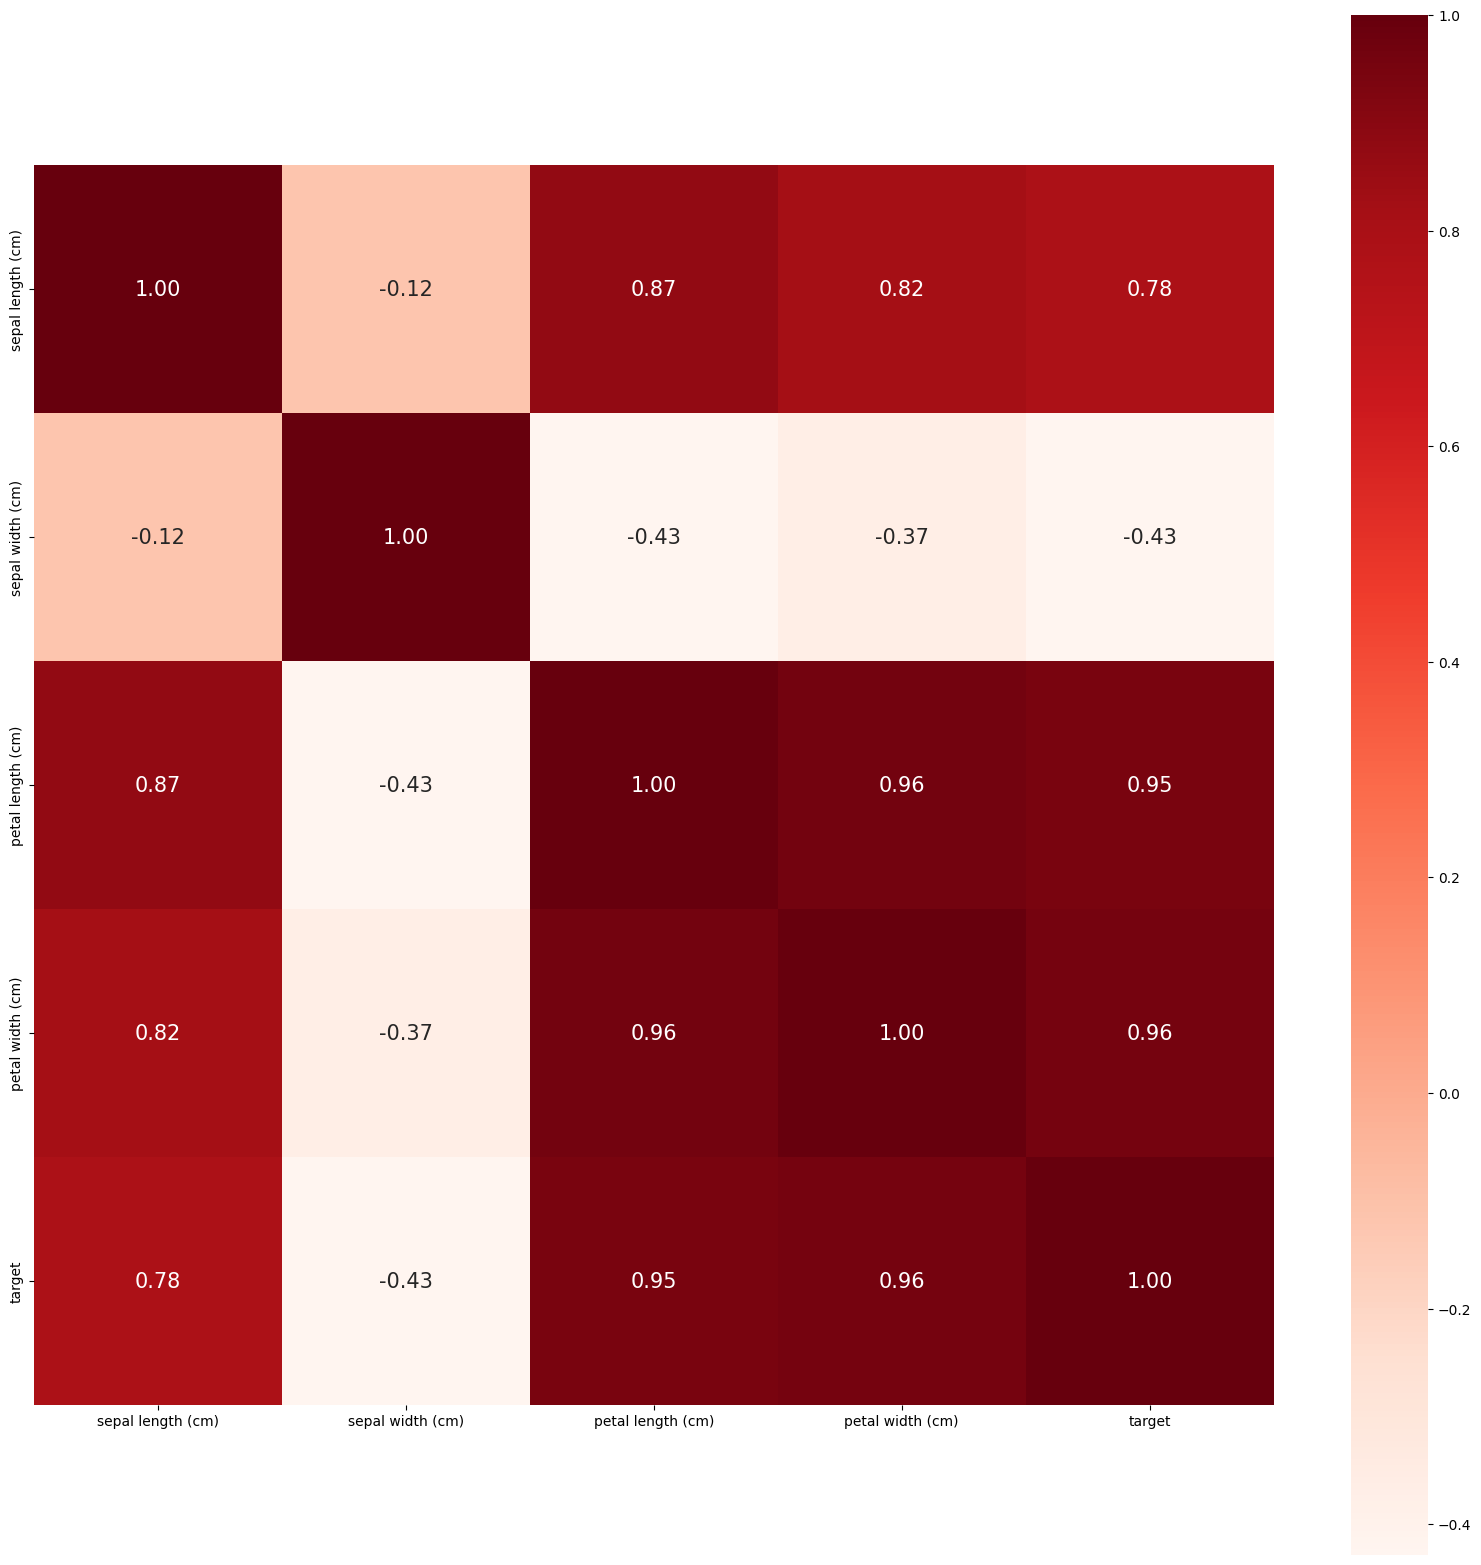

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
iris = iris.drop('target_name', axis=1)
corr = iris.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='Reds')

In [3]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


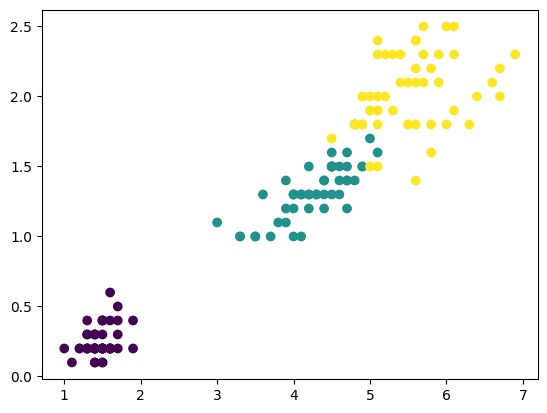

In [25]:
import matplotlib.pyplot as plt
plt.scatter(iris['petal length (cm)'],iris['petal width (cm)'],c=iris['target'])
plt.show()

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

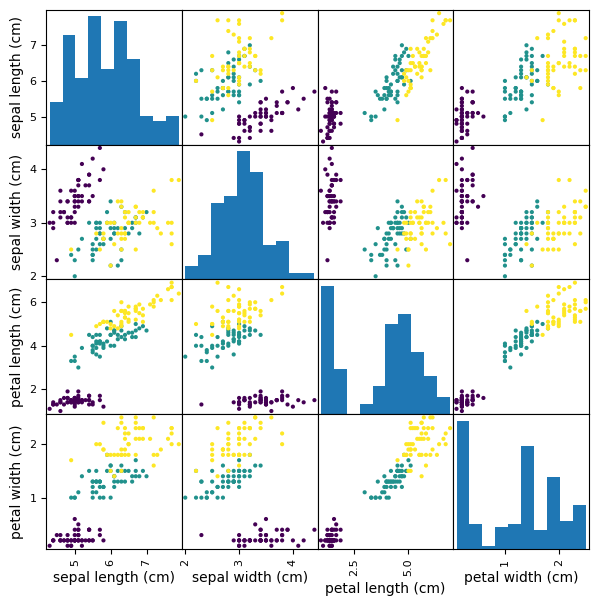

In [7]:
%matplotlib inline
from calendar import c
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(iris[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]],
                           figsize=(7,7),c=iris['target'],alpha=1)

In [20]:
df = iris.drop(["sepal length (cm)", "sepal width (cm)","target_name"],axis=1)
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=37)
for train_index, test_index in split.split(df, df["target"]):
 strat_train_set = df.loc[train_index]
 strat_test_set = df.loc[test_index]
train_copy = strat_train_set.copy()
test_set = strat_test_set
X_train = train_copy[["petal length (cm)", "petal width (cm)"]]
Y_train = train_copy['target']
X_test = test_set[["petal length (cm)", "petal width (cm)"]]
Y_test = test_set['target']

## Duplicando los datos de entrenamiento

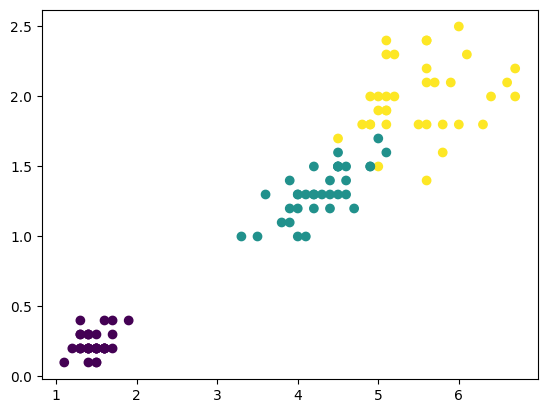

In [21]:
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'auto',random_state = 42)
X_resample, Y_resample = smote.fit_resample(X_train, Y_train)
plt.scatter(X_resample['petal length (cm)'],X_resample['petal width (cm)'],c=Y_resample)

In [24]:
X_train = pd.concat([X_train,X_resample],ignore_index=True)
Y_train = pd.concat([Y_train,Y_resample],ignore_index=True)
Y_train.unique()

array([1, 0, 2], dtype=int64)

# Entrenando los modelos de knn y tree

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=7)
knn_clf = knn_clf.fit(X_train,Y_train)

In [26]:
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_predict
y_train_knn_pred = cross_val_predict(knn_clf, X_train, Y_train, cv=3)
precision_score = precision_score(Y_train, y_train_knn_pred, average=None)
recall_score = recall_score(Y_train,y_train_knn_pred,average=None)
print(f"{precision_score} \n {recall_score}")


[1.         0.94594595 1.        ] 
 [1.         1.         0.94285714]


In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train, y_train_knn_pred)

array([[140,   0,   0],
       [  0, 140,   0],
       [  0,   8, 132]], dtype=int64)

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict

tree_clf = DecisionTreeClassifier()
tree_clf = tree_clf.fit(X_train,Y_train)

In [29]:

from sklearn.metrics import precision_score, recall_score
y_train_tree_pred = cross_val_predict(tree_clf, X_train, Y_train, cv=3)
precision_score = precision_score(Y_train, y_train_tree_pred, average=None)
recall_score = recall_score(Y_train,y_train_tree_pred,average=None)
print(f"{precision_score} \n {recall_score}")
confusion_matrix(Y_train,y_train_tree_pred)

[1. 1. 1.] 
 [1. 1. 1.]


array([[140,   0,   0],
       [  0, 140,   0],
       [  0,   0, 140]], dtype=int64)

In [30]:
from sklearn.model_selection import cross_val_score
knn_score = cross_val_score(knn_clf, X_train,Y_train, cv = 5, scoring = 'accuracy')
knn_score

array([0.97619048, 0.97619048, 0.97619048, 0.98809524, 0.97619048])

In [31]:
tree_score = cross_val_score(tree_clf, X_train,Y_train, cv = 5, scoring = "accuracy")
tree_score

array([1., 1., 1., 1., 1.])

# Evaluando el knn en el cojunto de prueba

In [32]:
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_predict
y_test_knn_pred = cross_val_predict(knn_clf, X_test, Y_test, cv=3)
precision_score = precision_score(Y_test, y_test_knn_pred, average=None)
recall_score = recall_score(Y_test,y_test_knn_pred,average=None)
print(f"{precision_score} \n {recall_score}")

[1.         0.88235294 1.        ] 
 [1.         1.         0.86666667]


In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_test_knn_pred)

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  2, 13]], dtype=int64)